Detection2

In [5]:
!pip install -U torch==1.4+cu100 torchvision==0.5+cu100 -f https://download.pytorch.org/whl/torch_stable.html
!pip install cython pyyaml==5.1
!pip install -U ‘git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo
#!pip install opencv-python Google Colab already comes with OpenCV

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 723.9 MB 25 kB/s 
     |████████████████████████████████| 4.0 MB 21.8 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.7.1+cu101
    Uninstalling torch-1.7.1+cu101:
      Successfully uninstalled torch-1.7.1+cu101
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.8.2+cu101
    Uninstalling torchvision-0.8.2+cu101:
      Successfully uninstalled torchvision-0.8.2+cu101
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.10.0 requires torch==1.9.0, but you have torch 1.4.0+cu100 which is incompatible.
torchaudio 0.7.2 requires torch==1.7.1, but you have torch 1.4.0+cu100 which is incompatible.


/bin/bash: -c: line 0: unexpected EOF while looking for matching `''
/bin/bash: -c: line 1: syntax error: unexpected end of file
Cloning into 'detectron2_repo'...
remote: Enumerating objects: 13396, done.
remote: Counting objects: 100% (897/897), done.
remote: Compressing objects: 100% (460/460), done.
remote: Total 13396 (delta 558), reused 709 (delta 431), pack-reused 12499
Receiving objects: 100% (13396/13396), 5.72 MiB | 16.51 MiB/s, done.
Resolving deltas: 100% (9514/9514), done.
Obtaining file:///content/detectron2_repo
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command output.


In [10]:
import torch 
print(torch.__version__)
print(torch.cuda.is_available())

1.7.1+cu101
True


In [11]:
# import some common libraries
import numpy as np
import cv2
import random
from google.colab.patches import cv2_imshow # On your local machine you don’t need it.
# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
from google.colab.patches import cv2_imshow


In [ ]:
from google.colab import drive
drive.mount(‘/content/drive’)

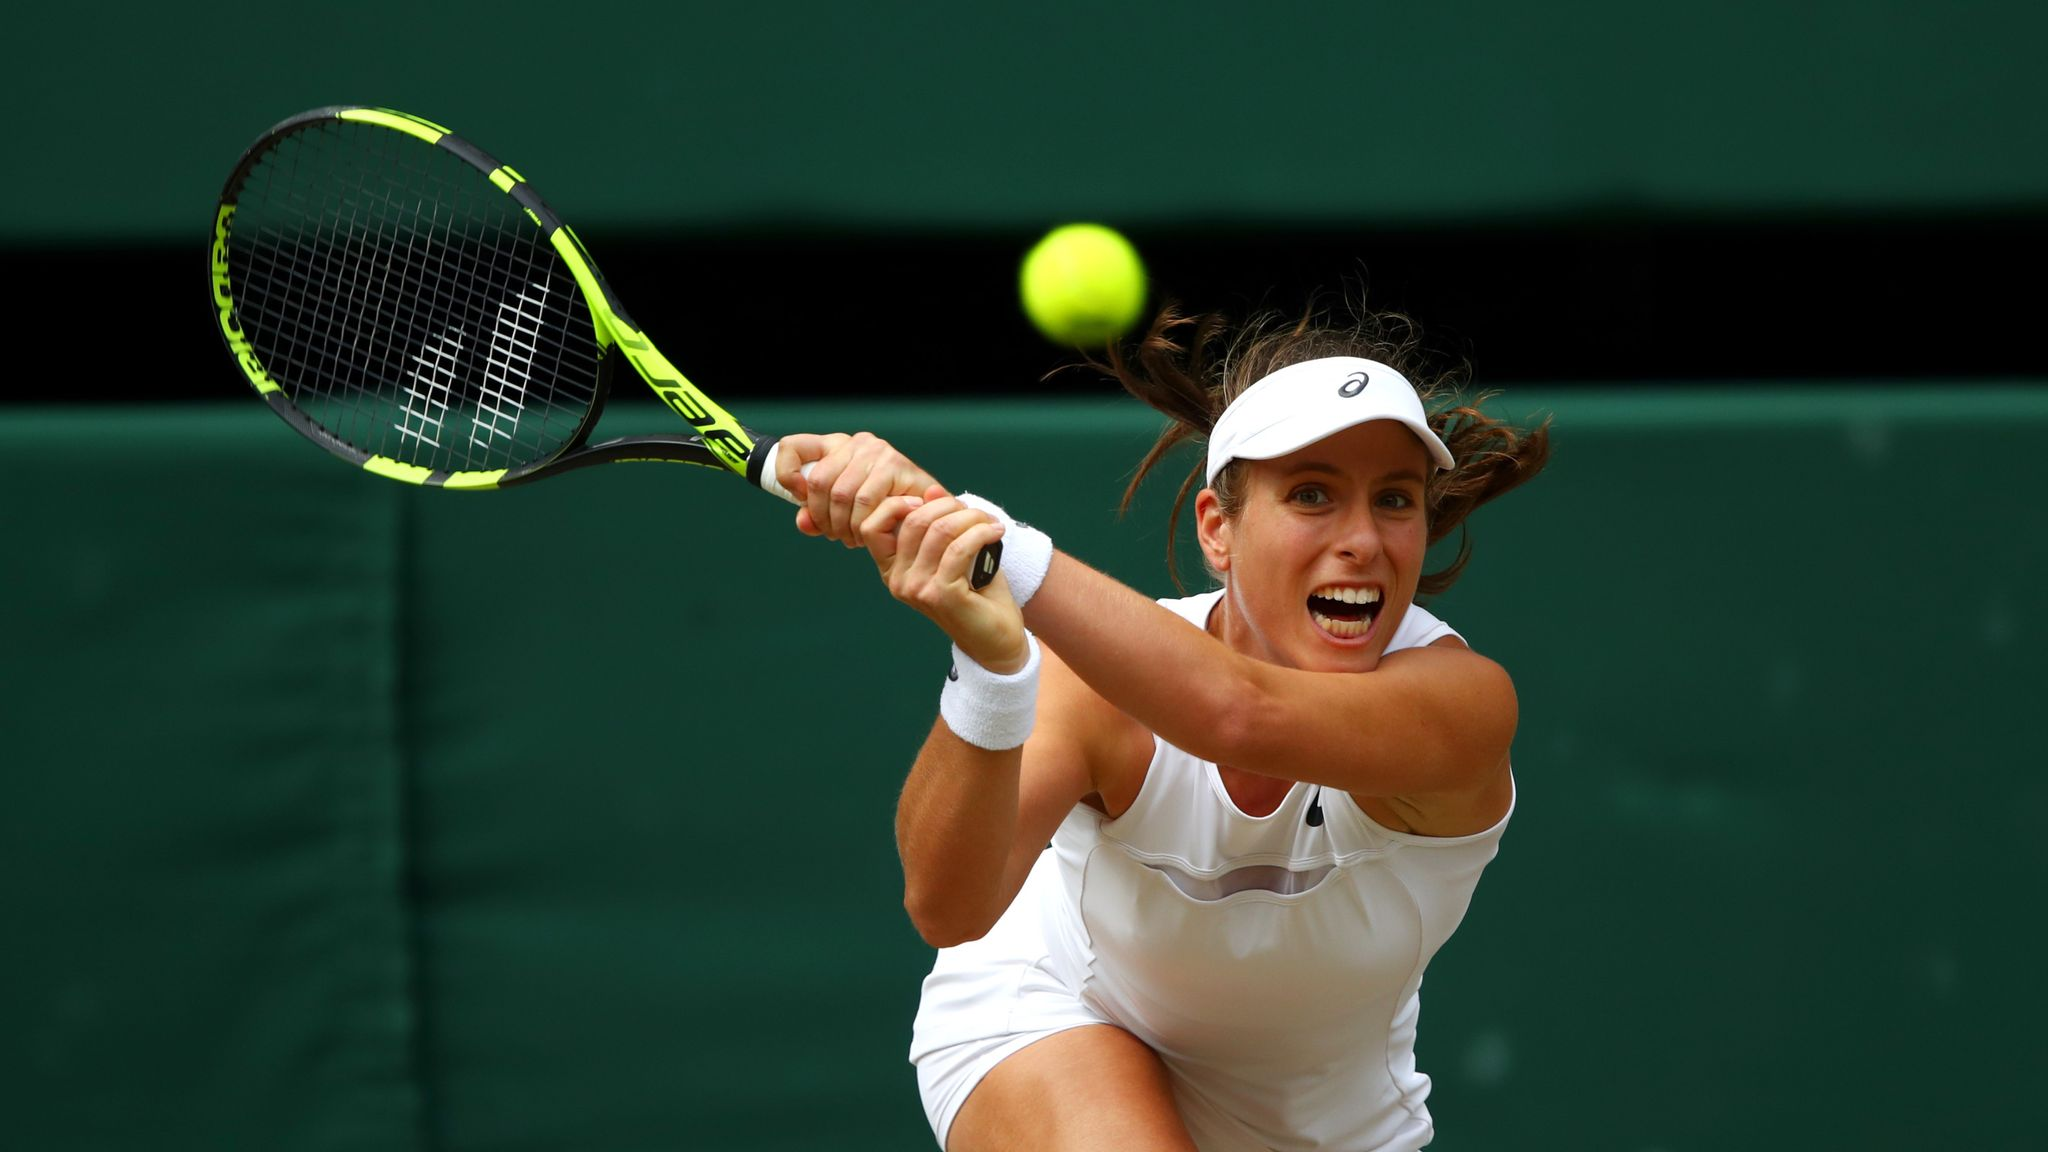

In [12]:
im = cv2.imread("/content/sample_data/skysports-johanna-konta.jpg")
cv2_imshow(im)


https://github.com/facebookresearch/detectron2/blob/main/MODEL_ZOO.md

In [15]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5 # set threshold for this model


In [16]:
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_68b088.pkl: 421MB [00:14, 28.3MB/s]                           
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}
/usr/local/lib/python3.7/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:154: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


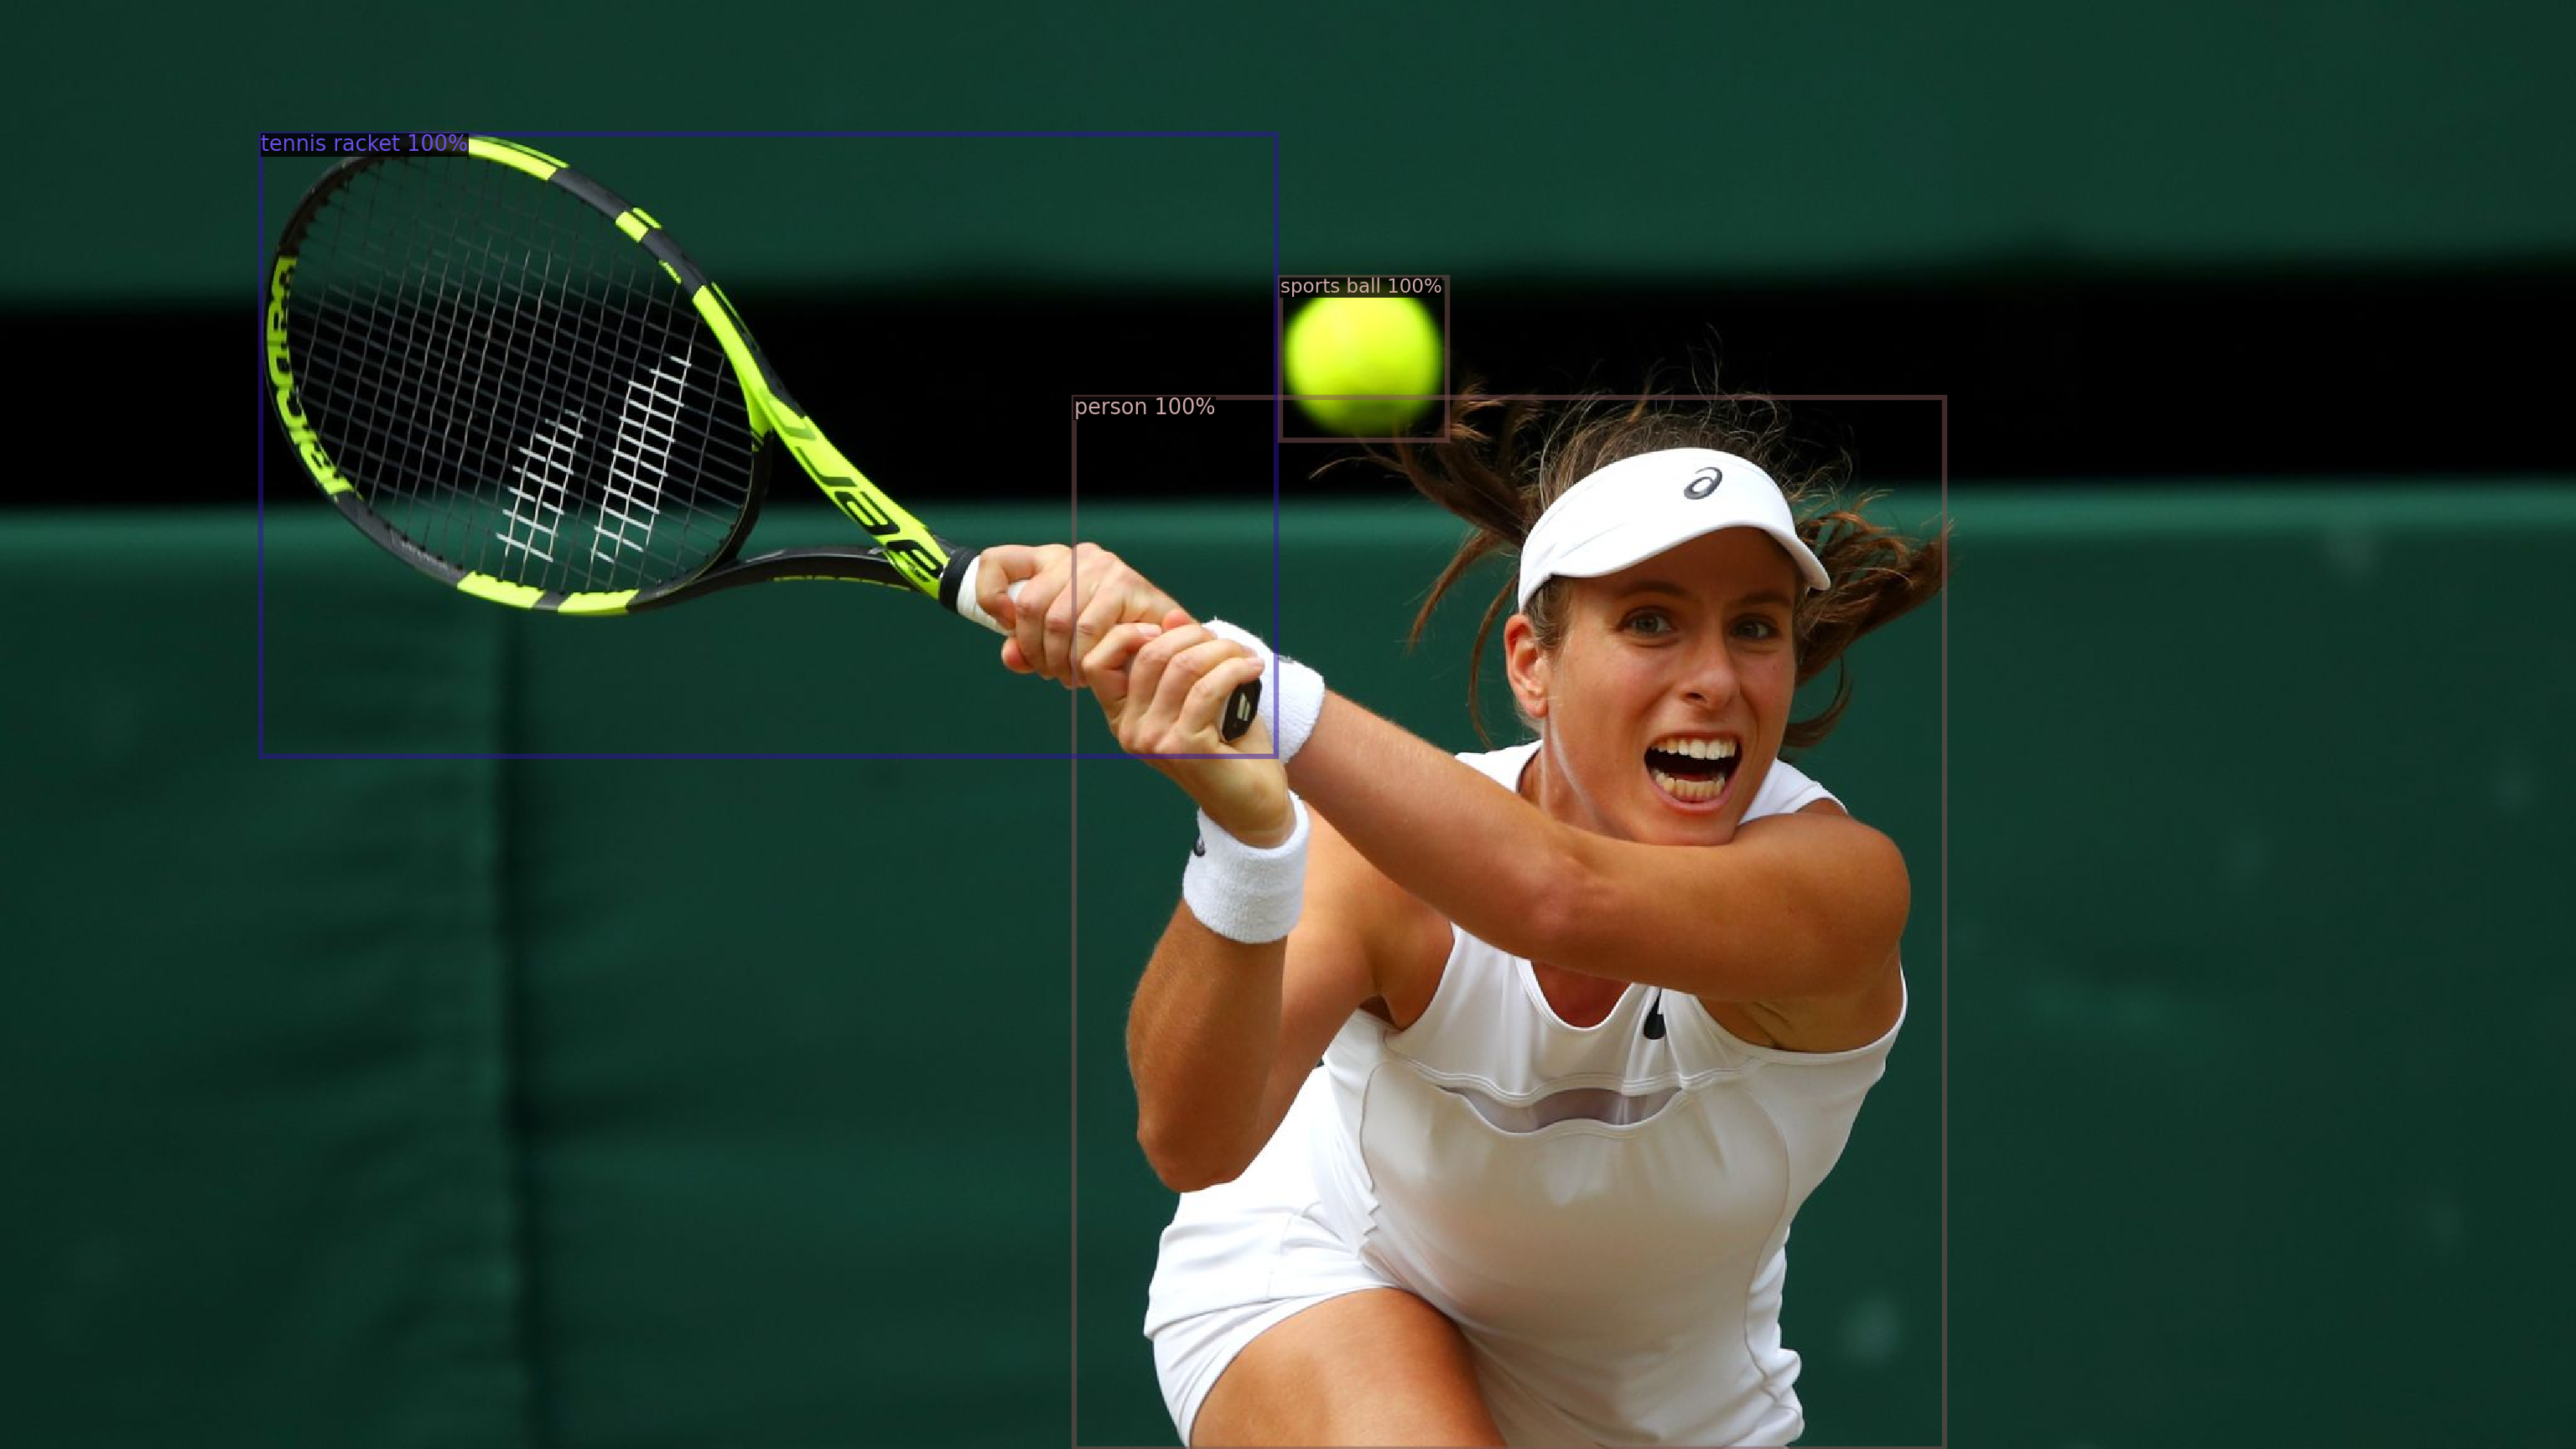

In [18]:
v = Visualizer(im, MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.5) # Scaling the image 1.5 times, for big images consider a value below 0
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(v.get_image())